# Limpieza y preparación de datos

## 2.1 Tratamiento de los datos que faltan

### En muchas aplicaciones de análisis de datos es habitual que falten datos. Uno de los objetivos de pandas es hacer que trabajar con datos perdidos sea lo menos doloroso posible. Por ejemplo, todas las estadísticas descriptivas de los objetos de pandas excluyen por defecto los datos que faltan.

### La forma en que se representan los datos que faltan en los objetos de pandas es algo imperfecta, pero es suficiente para la mayoría de los usos en el mundo real. Para datos con dtype float64, pandas utiliza el valor de coma flotante NaN (`Not a Number`) para representar los datos que faltan.

Lo llamamos valor centinela (sentinel value): cuando está presente, indica un valor ausente (o nulo):

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import session_info
float_data = pd.Series([1.8, -3.5, np.nan, 0])

In [3]:
float_data

0    1.8
1   -3.5
2    NaN
3    0.0
dtype: float64

El método `isna` nos da una Serie Booleana con `True` donde los valores son 'nulos':

In [4]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

En pandas, hemos adoptado una convención utilizada en el lenguaje de programación R refiriéndonos a los datos perdidos como `NA`, que significa no disponible (`Not Available`). 

El valor `None` (ausencia de un valor o un valor nulo) incorporado en Python también se trata como `NA`:

In [5]:
string_data = pd.Series(['abcd', np.nan, None, 'dfeg'])

string_data

0    abcd
1     NaN
2    None
3    dfeg
dtype: object

In [6]:
string_data.isna()

0    False
1     True
2     True
3    False
dtype: bool

El método `isna` nos da una Serie Booleana con `True` donde los valores son 'nulos':

In [7]:
float_data = pd.Series([1, 2, None], dtype='float64')
float_data

0    1.0
1    2.0
2    NaN
dtype: float64

In [8]:
float_data.isna()

0    False
1    False
2     True
dtype: bool

**Otros metodos**


`dropna()`: es un método utilizado para eliminar filas o columnas que contienen valores nulos (NaN).  

`fillna`: Rellena los datos que faltan con algún valor o utilizando un método de interpolación como `ffill` o `bfill`.

`ìsna()`: Devuelve valores booleanos que indican qué valores faltan `NA`. 

`notna`: Negación de `isna`, devuelve `True` para valores no `NA` y False para valores `NA`.

### Filtrar los datos que faltan

Hay algunas formas de filtrar los datos que faltan. Aunque siempre se tiene la opción de hacerlo a mano usando `pandas.isna()` y la indexación booleana, `dropna()` puede ser útil. En una Serie, devuelve la Serie con sólo los datos no nulos y los valores de índice:

In [9]:
data = pd.Series([1, np.nan, 3.5, np.nan, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

Esto es lo mismo que hacer:

In [10]:
data[data.notna()]

0    1.0
2    3.5
4    7.0
dtype: float64

Con los objetos DataFrame, hay diferentes formas de eliminar los datos que faltan. Es posible que desee eliminar las filas o columnas que son todas NA, o sólo las filas o columnas que contienen cualquier NA en absoluto. `dropna()` por defecto elimina cualquier fila que contenga un valor perdido:

In [11]:
data = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan],
             [np.nan, np.nan, np.nan],
             [np.nan, 6.5, 3.]])

data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [12]:
 data.dropna()

,0,1,2
0,1.0,6.5,3.0


Si se pasa `how="all"`, sólo se eliminarán las filas que sean todas NA:

In [13]:
data.dropna(how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


Tenga en cuenta que estas funciones devuelven nuevos objetos por defecto y no modifican el contenido del objeto original.

Para soltar (drop) columnas del mismo modo, pase `axis="columns"`:


In [14]:
data[4] = np.nan
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [15]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


Supongamos que desea conservar sólo las filas que contengan como máximo un determinado número de observaciones omitidas.  
Puede indicarlo con el argumento `thresh`, el cual especifica el número mínimo de valores no nulos que deben estar presentes en una fila o columna para que no sea eliminada.  
Si una fila o columna no cumple con este umbral mínimo de valores no nulos, será eliminada del DataFrame.

In [16]:
 df = pd.DataFrame(np.random.standard_normal((7, 3)))

In [17]:
df

,0,1,2
0,0.037240,-0.812999,0.576066
1,-1.263102,0.389403,1.236278
2,-0.762541,0.618373,0.454125
3,0.458609,0.926451,-2.075206
4,0.462403,-0.239079,-0.282685
5,-1.196976,-0.071604,-0.951106
6,1.619244,1.433744,0.287846


In [18]:
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan

In [19]:
df

,0,1,2
0,0.037240,NaN,NaN
1,-1.263102,NaN,NaN
2,-0.762541,NaN,0.454125
3,0.458609,NaN,-2.075206
4,0.462403,-0.239079,-0.282685
5,-1.196976,-0.071604,-0.951106
6,1.619244,1.433744,0.287846


In [20]:
df.dropna()

,0,1,2
4,0.462403,-0.239079,-0.282685
5,-1.196976,-0.071604,-0.951106
6,1.619244,1.433744,0.287846


In [21]:
df.dropna(thresh=2)

,0,1,2
2,-0.762541,NaN,0.454125
3,0.458609,NaN,-2.075206
4,0.462403,-0.239079,-0.282685
5,-1.196976,-0.071604,-0.951106
6,1.619244,1.433744,0.287846


### Rellenar los datos que faltan

En lugar de filtrar los datos que faltan (y potencialmente descartar otros datos junto con ellos), es posible que desee rellenar los "huecos" de varias maneras. Para la mayoría de los propósitos, el método `fillna()` es la función a utilizar. Llamar a `fillna()` con una constante sustituye los valores que faltan por ese valor:

In [22]:
df

,0,1,2
0,0.037240,NaN,NaN
1,-1.263102,NaN,NaN
2,-0.762541,NaN,0.454125
3,0.458609,NaN,-2.075206
4,0.462403,-0.239079,-0.282685
5,-1.196976,-0.071604,-0.951106
6,1.619244,1.433744,0.287846


In [23]:
df.fillna(0)

,0,1,2
0,0.037240,0.000000,0.000000
1,-1.263102,0.000000,0.000000
2,-0.762541,0.000000,0.454125
3,0.458609,0.000000,-2.075206
4,0.462403,-0.239079,-0.282685
5,-1.196976,-0.071604,-0.951106
6,1.619244,1.433744,0.287846


Llamando a `fillna()` con un diccionario, puede utilizar un valor de relleno diferente para cada columna:

In [24]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,0.037240,0.500000,0.000000
1,-1.263102,0.500000,0.000000
2,-0.762541,0.500000,0.454125
3,0.458609,0.500000,-2.075206
4,0.462403,-0.239079,-0.282685
5,-1.196976,-0.071604,-0.951106
6,1.619244,1.433744,0.287846


Los mismos métodos de interpolación disponibles para la reindexación pueden utilizarse con `fillna()`:

In [25]:
df = pd.DataFrame(np.random.standard_normal((6, 3)))

In [26]:
df.iloc[2:, 1] = np.nan
df.iloc[4:, 2] = np.nan
df

,0,1,2
0,-0.301438,0.029577,-1.136885
1,1.050329,-0.058200,-0.434204
2,0.327677,NaN,-0.770427
3,-1.804092,NaN,-0.929727
4,0.883677,NaN,NaN
5,-0.246199,NaN,NaN


In [27]:
 df.fillna(method="ffill")

C:\Users\juanj\AppData\Local\Temp\ipykernel_17856\4205080046.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill")


,0,1,2
0,-0.301438,0.029577,-1.136885
1,1.050329,-0.058200,-0.434204
2,0.327677,-0.058200,-0.770427
3,-1.804092,-0.058200,-0.929727
4,0.883677,-0.058200,-0.929727
5,-0.246199,-0.058200,-0.929727


In [28]:
df.fillna(method="ffill", limit=2)

C:\Users\juanj\AppData\Local\Temp\ipykernel_17856\1627181726.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", limit=2)


,0,1,2
0,-0.301438,0.029577,-1.136885
1,1.050329,-0.058200,-0.434204
2,0.327677,-0.058200,-0.770427
3,-1.804092,-0.058200,-0.929727
4,0.883677,NaN,-0.929727
5,-0.246199,NaN,-0.929727


Con `fillna()` puede hacer muchas otras cosas, como la imputación simple de datos utilizando la mediana o la media estadística:

In [29]:
data = pd.Series([1., np.nan, 3.5, np.nan, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [30]:
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

**Funciones de argumento para `fillna`**

`value`: Valor escalar u objeto tipo diccionario que se utilizará para rellenar los valores que faltan.

`method`: Método de interpolación: uno de "bfill" (relleno hacia atrás) o "ffill" (relleno hacia delante); por defecto es None

`axis`: Eje de relleno ("index" o "columns"); por defecto axis="index".

`limit`: Para el llenado hacia delante y hacia atrás, número máximo de periodos consecutivos a llenar

## 2.2 Transformación de datos

Hasta ahora nos hemos ocupado de la gestión de los datos que faltan. El filtrado, la limpieza y otras transformaciones son otra clase de operaciones importantes.

### Remover duplicados

Pueden encontrarse filas duplicadas en un DataFrame por cualquier número de razones. He aquí un ejemplo:

In [31]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"],
                     "k2":[1, 1, 2, 3, 3, 4, 4]})

In [32]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


El método DataFrame `duplicated` devuelve una serie booleana que indica si cada fila es un duplicado (sus valores de columna son exactamente iguales a los de una fila anterior) o no:

In [33]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

En relación con esto, `drop_duplicates` devuelve un DataFrame con filas en las que se ha filtrado False el array duplicado:

In [34]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


Ambos métodos consideran por defecto todas las columnas; alternativamente, puede especificar cualquier subconjunto de ellas para detectar duplicados. Supongamos que tenemos una columna adicional de valores y queremos filtrar los duplicados basándonos sólo en la columna "k1":

In [35]:
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [36]:
# Añadimos una tercera columna
data["v1"] = range(7)
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [37]:
data.drop_duplicates(subset=["k1"])

,k1,k2,v1
0,one,1,0
1,two,1,1


`duplicated` y `drop_duplicates` mantienen por defecto la primera combinación de valores observada. Si se pasa `keep="last"` se devolverá la última.  
El argumento `keep` puede tomar tres valores:

`"first"`: (por defecto) Mantiene la primera aparición de una fila duplicada y elimina las subsecuentes.  

`"last"`: Mantiene la última aparición de una fila duplicada y elimina las anteriores.  

`"False"`: Elimina todas las filas duplicadas, no conservando ninguna.

In [38]:
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [39]:
data.drop_duplicates(["k1", "k2"], keep="last")

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


### Transformación de datos mediante una `Function` o `Mapping`

Para muchos conjuntos de datos, es posible que desee realizar alguna transformación basada en los valores de un array, Serie o columna de un DataFrame. Considere los siguientes datos hipotéticos recogidos sobre varios tipos de jamón:

In [40]:
data = pd.DataFrame({"food": ["bacon", "pulled pork",
                              "bacon","pastrami", "corned beef",
                              "bacon", "pastrami", "honey ham",
                              "nova lox"],
                     "ounces": [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5
5,bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


Supongamos que queremos añadir una columna que indique el tipo de animal del que procede cada alimento. Escribamos una correspondencia entre cada tipo de carne y el tipo de animal:

In [41]:
meat_to_animal = {
  "bacon": "pig",
  "pulled pork": "pig",
  "pastrami": "cow",
  "corned beef": "cow",
  "honey ham": "pig",
  "nova lox": "salmon"
}

El método `map` de una serie acepta una función u objeto de tipo diccionario que contenga un mapeo para realizar la transformación de los valores:

In [42]:
data["animal"] = data["food"].map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


También podríamos haber pasado una función que haga todo el trabajo:

In [43]:
def get_animal(x):
    return meat_to_animal[x]

data["animal"] = data["food"].map(get_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,pastrami,6.0,cow
4,corned beef,7.5,cow
5,bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


### Sustitución de valores

Rellenar los datos que faltan con el método `fillna` es un caso especial de sustitución de valores más general. Como ya se ha visto, `map` puede utilizarse para modificar un subconjunto de valores de un objeto, tambien `replace` proporciona una forma más sencilla y flexible de hacerlo. Consideremos esta serie:

In [44]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

Los valores `-999` podrían ser valores centinela de datos perdidos. Para reemplazarlos por valores `NA` que pandas entienda, podemos usar `replace`, produciendo una nueva Serie:

In [45]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

Si desea sustituir varios valores a la vez, debe pasar una lista y, a continuación, el valor sustituido:

In [46]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

Para utilizar un sustituto diferente para cada valor, pase una lista de sustitutos:

In [47]:
 data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

El argumento pasado también puede ser un diccionario:

In [48]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

El método `data.replace()` es distinto de `data.str.replace`, que realiza la sustitución de cadenas por elementos. Veremos estos métodos de cadena en Series más adelante.

### Renombrar índices de ejes

Al igual que los valores de una Serie, las etiquetas de los ejes pueden transformarse de forma similar mediante una función o un mapeo (`mapping`) de algún tipo para producir nuevos objetos etiquetados de forma diferente. También puede modificar los ejes in situ sin crear una nueva estructura de datos. He aquí un ejemplo sencillo:

In [49]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=["Ohio", "Colorado", "New York"],
                    columns=["one", "two", "three", "four"])
                    
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


Al igual que una Serie, los índices de eje tienen un método `map`:

In [50]:
def transform(x):
    return x[:4].upper()

data.index.map(transform)
#Index(['OHIO', 'COLO', 'NEW '], dtype='object')

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [51]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


You can assign to the `index` attribute, modifying the DataFrame in place:

In [52]:
data.index = data.index.map(transform)
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


Si desea crear una versión transformada de un conjunto de datos sin modificar el original, un método útil es `rename`:


In [53]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


En particular, renombrar puede utilizarse junto con un objeto tipo diccionario, proporcionando nuevos valores para un subconjunto de las etiquetas de los ejes:

In [54]:
data.rename(index={"OHIO": "Madrid"},
            columns={"three": "tres"})
            

,one,two,tres,four
Madrid,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


### 2.3 Discretización y `binning`

La discretización y el binning son técnicas utilizadas en la preprocesamiento de datos para convertir datos continuos en discretos. Estas técnicas son útiles para reducir la variabilidad, agrupar datos similares y mejorar el rendimiento de algunos algoritmos de aprendizaje automático

### Discretización.  

Es el proceso de convertir datos continuos en datos categóricos dividiendo el rango de valores continuos en intervalos (bins).

### Binning (Agrupación por intervalos)
El `binning` es una técnica de discretización que agrupa los datos en intervalos, o `"bins"`.  
Hay varios métodos para hacer `binning` en pandas, como el binning por frecuencia, el binning por longitud de intervalo y el binning basado en la cuantilación (por ejemplo Cuartil).

Los datos continuos suelen discretizarse o separarse en "intervalos" (bins) para su análisis. Supongamos que se dispone de datos sobre un grupo de personas en un estudio y desea agruparlas en grupos de edad discretos:

In [55]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

Vamos a dividirlos en franjas (bins) de 18 a 25, de 26 a 35, de 36 a 60 y, por último, de 61 años en adelante. Para ello, hay que utilizar `pandas.cut`:

In [56]:
bins = [18, 25, 35, 60, 100]

In [57]:
age_categories = pd.cut(ages, bins)

In [58]:
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

El objeto que pandas devuelve es un objeto `Categorical` especial. La salida que se ve describe los bins calculados por `pandas.cut`. Cada bin se identifica por un tipo de valor de intervalo especial (único en pandas) que contiene el límite inferior y superior de cada bin:

In [59]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [60]:
age_categories.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [61]:
age_categories.categories[0]

Interval(18, 25, closed='right')

In [62]:
pd.value_counts(age_categories)

C:\Users\juanj\AppData\Local\Temp\ipykernel_17856\3010498523.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(age_categories)


(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
Name: count, dtype: int64

Tenga en cuenta que `pd.value_counts(categories)` son los recuentos bin del resultado de `pandas.cut`.

En la representación de cadena de un intervalo, un paréntesis significa que el lado está abierto (excluyente), mientras que el corchete significa que está cerrado (incluyente). Puede cambiar el lado cerrado pasando `right=False`

In [63]:
pd.cut(ages, bins, right=False)

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [25, 35), [60, 100), [35, 60), [35, 60), [25, 35)]
Length: 12
Categories (4, interval[int64, left]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

Puede anular el etiquetado de contenedores por defecto basado en intervalos pasando una lista o array a la opción `labels`:

In [64]:
group_names = ["Youth", "YoungAdult", "MiddleAged", "Senior"]
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

Consideremos el caso de unos datos distribuidos uniformemente y cortados en cuartos:

In [65]:
data = np.random.uniform(size=20)
data

array([0.91758623, 0.97192282, 0.56148241, 0.19944218, 0.20581642,
       0.34610461, 0.30212594, 0.54810421, 0.26075454, 0.48487982,
       0.32043155, 0.80791751, 0.42016826, 0.91310527, 0.42938026,
       0.20660705, 0.2178369 , 0.44823482, 0.53140467, 0.88955266])

In [66]:
pd.cut(data, 4, precision=2)

[(0.78, 0.97], (0.78, 0.97], (0.39, 0.59], (0.2, 0.39], (0.2, 0.39], ..., (0.2, 0.39], (0.2, 0.39], (0.39, 0.59], (0.39, 0.59], (0.78, 0.97]]
Length: 20
Categories (4, interval[float64, right]): [(0.2, 0.39] < (0.39, 0.59] < (0.59, 0.78] < (0.78, 0.97]]

La opción `precision=2` limita la precisión decimal a dos dígitos distintos de cero.

Una función estrechamente relacionada, `pandas.qcut`, separa los datos basándose en los cuantiles de la muestra. Dependiendo de la distribución de los datos, el uso de `pandas.cut` no siempre resultará en que cada contenedor tenga el mismo número de puntos de datos. Dado que `pandas.qcut` utiliza los cuantiles de la muestra en su lugar, obtendrá intervalos de tamaño más o menos igual:

In [67]:
data = np.random.standard_normal(1000)
data

array([-4.56050338e-01, -1.95457592e+00,  2.81153661e-01, -5.88627729e-01,
       -1.06405807e+00,  1.45372074e-01,  1.82691413e-01,  1.59114934e+00,
       -5.50987753e-02,  1.09378790e+00, -3.49001648e-03, -1.30324095e+00,
       -6.31933668e-01, -1.15328880e+00,  4.10991633e-01,  6.99666542e-01,
        4.06599362e-01,  5.32421661e-01,  2.26114711e+00,  1.36608981e+00,
       -7.53797187e-02, -2.64657033e-01,  1.96535155e-01, -1.79659774e+00,
        1.61012912e+00,  7.61567719e-02, -7.49269815e-01, -1.67412977e-01,
        6.56398390e-02,  5.27021087e-01, -7.98373263e-01,  1.55216608e+00,
        6.93222935e-01,  5.97753644e-01,  4.06699118e-01,  4.31074041e-01,
       -5.39060215e-01, -1.05697121e+00,  9.93754116e-01,  3.39047113e-01,
        2.56007738e-01, -9.45023774e-01,  2.07765115e+00,  2.01458287e+00,
       -2.70685277e-01,  2.56882601e-01,  1.99433985e-01,  5.19334302e-01,
        3.16879115e-01,  2.97639463e-01, -4.87017902e-01, -6.62342696e-01,
       -9.36920652e-02,  

In [68]:
quartiles = pd.qcut(data, 4, precision=2)
quartiles

[(-0.74, -0.058], (-3.67, -0.74], (-0.058, 0.61], (-0.74, -0.058], (-3.67, -0.74], ..., (0.61, 2.6], (0.61, 2.6], (-0.74, -0.058], (0.61, 2.6], (-0.74, -0.058]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.67, -0.74] < (-0.74, -0.058] < (-0.058, 0.61] < (0.61, 2.6]]

In [69]:
pd.value_counts(quartiles)

C:\Users\juanj\AppData\Local\Temp\ipykernel_17856\3472704981.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(quartiles)


(-3.67, -0.74]     250
(-0.74, -0.058]    250
(-0.058, 0.61]     250
(0.61, 2.6]        250
Name: count, dtype: int64

In [70]:
pd.Series(quartiles).value_counts()

(-3.67, -0.74]     250
(-0.74, -0.058]    250
(-0.058, 0.61]     250
(0.61, 2.6]        250
Name: count, dtype: int64

De forma similar a `pandas.cut`, el usuario puede pasar sus propios cuantiles (números entre 0 y 1, ambos inclusive):

In [71]:
data

array([-4.56050338e-01, -1.95457592e+00,  2.81153661e-01, -5.88627729e-01,
       -1.06405807e+00,  1.45372074e-01,  1.82691413e-01,  1.59114934e+00,
       -5.50987753e-02,  1.09378790e+00, -3.49001648e-03, -1.30324095e+00,
       -6.31933668e-01, -1.15328880e+00,  4.10991633e-01,  6.99666542e-01,
        4.06599362e-01,  5.32421661e-01,  2.26114711e+00,  1.36608981e+00,
       -7.53797187e-02, -2.64657033e-01,  1.96535155e-01, -1.79659774e+00,
        1.61012912e+00,  7.61567719e-02, -7.49269815e-01, -1.67412977e-01,
        6.56398390e-02,  5.27021087e-01, -7.98373263e-01,  1.55216608e+00,
        6.93222935e-01,  5.97753644e-01,  4.06699118e-01,  4.31074041e-01,
       -5.39060215e-01, -1.05697121e+00,  9.93754116e-01,  3.39047113e-01,
        2.56007738e-01, -9.45023774e-01,  2.07765115e+00,  2.01458287e+00,
       -2.70685277e-01,  2.56882601e-01,  1.99433985e-01,  5.19334302e-01,
        3.16879115e-01,  2.97639463e-01, -4.87017902e-01, -6.62342696e-01,
       -9.36920652e-02,  

In [72]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.]).value_counts()

(-3.665, -1.31]     100
(-1.31, -0.0584]    400
(-0.0584, 1.272]    400
(1.272, 2.601]      100
Name: count, dtype: int64

El segundo argumento `[0, 0.1, 0.5, 0.9, 1.]` especifica los puntos de corte para los cuantiles.  
Estos puntos de corte son porcentajes que indican cómo se deben dividir los datos.  

`0` corresponde al valor mínimo.  
`0.1` corresponde al percentil 10 (el valor por debajo del cual se encuentra el 10% de los datos).  
`0.5` corresponde al percentil 50 (la mediana).  
`0.9` corresponde al percentil 90 (el valor por debajo del cual se encuentra el 90% de los datos).  
`1.` corresponde al valor máximo.  

### 2.4 Detección y filtrado de valores atípicos (outliers)

Filtrar o transformar los valores atípicos es en gran medida una cuestión de aplicar operaciones de arrays. Considere el siguiente DataFrame:

**Un valor atípico (outlier, en inglés) es una observación que numéricamente es muy distinta al resto de elementos de una muestra. Estos datos nos pueden causar problemas en la interpretación de lo que ocurre en un proceso o en una población.**

![at1](at1.jpg)

La pregunta que nos podemos plantear es inmediata. ¿Qué hacemos con esos valores atípicos? La opción de ignorarlos a veces no es la mejor de las soluciones posibles si pretendemos conocer qué ha pasado con estos valores. Lo bien cierto es que distorsionan los resultados del análisis, por lo que hay que identificarlos y tratarlos de forma adecuada. A veces se excluyen si son resultado de un error, pero otras veces son datos potencialmente interesantes en la detección de anomalías.

Los valores atípicos pueden deberse a errores en la recolección de datos válidos que muestran un comportamiento diferente, pero reflejan la aleatoriedad de la variable en estudio. Es decir, valores que pueden haber aparecido como parte del proceso, aunque parezcan extraños. Si los valores atípicos son parte del proceso, deben conservarse. En cambio, si ocurren por algún tipo de error (medida, codificación…), lo adecuado es su eliminación.

En la siguiente tabla se recogen algunas de las causas comunes de los valores atípicos y sus acciones posibles.

| Causa                     | Acciones posibles                                                                                              |
|---------------------------|---------------------------------------------------------------------------------------------------------------|
| Error de entrada de datos | Corregir el error y volver a analizar los datos.                                                              |
| Problema del proceso      | Investigar el proceso para determinar la causa del valor atípico.                                             |
| Factor faltante           | Determinar si no se consideró un factor que afecta el proceso.                                                |
| Probabilidad aleatoria    | Investigar el proceso y el valor atípico para determinar si este se produjo en virtud de las probabilidades; realice el análisis con y sin el valor atípico para ver su impacto en los resultados. |


Los valores atípicos a veces son subjetivos y existen numerosos métodos para clasificarlos. La detección de valores atípicos se puede realizar a nivel univariante usando gráficos sencillos como histogramas o diagramas de caja y bigotes. A nivel bivariante se pueden localizar mediante análisis de diagrama de dispersión o análisis de los residuos. En el ámbito multivariante se pueden descubrir los valores atípicos mediante un análisis de la matriz de residuos.

El método más habitual por su sencillez y resultados es el test de Tukey, que toma como referencia la diferencia entre el primer cuartil (Q1) y el tercer cuartil (Q3), o rango intercuartílico. En un diagrama de caja se considera un valor atípico el que se encuentra 1,5 veces esa distancia de uno de esos cuartiles (atípico leve) o a 3 veces esa distancia (atípico extremo). Se trata de un método paramétrico que supone que la población es normal (Ver siguiente figura ). No obstante, también existen métodos no paramétricos cuando la muestra no supere la prueba de normalidad correspondiente.

![at2](at2.png)

### Ejemplo para filtrar valores atípicos de un dataset que no sigue una normal standard:

In [73]:
data_values = [
    [-3.10, 0.28, 3.2, 4.6],
    [3.6, 2.5, 0.02, 1.2],
    [4.5, 1.12, 0.036, -1.1],
    [2.1, -0.38, -0.98, -2.3],
    [-2.01, 0, 0.56, 1.12],
    [-1.6, -1.29, -0.22, 0.8],
    [-3.28, -2.06, 0.17, 4.6],
    [2.17, 0.13, -4.81, -1.09]
]

data = pd.DataFrame(data_values, columns=['A', 'B', 'C', 'D'])
data

,A,B,C,D
0,-3.10,0.28,3.200,4.60
1,3.60,2.50,0.020,1.20
2,4.50,1.12,0.036,-1.10
3,2.10,-0.38,-0.980,-2.30
4,-2.01,0.00,0.560,1.12
5,-1.60,-1.29,-0.220,0.80
6,-3.28,-2.06,0.170,4.60
7,2.17,0.13,-4.810,-1.09


In [74]:
data.describe()

,A,B,C,D
count,8.000000,8.000000,8.000000,8.000000
mean,0.297500,0.037500,-0.253000,0.978750
std,3.130252,1.395941,2.210915,2.554517
min,-3.280000,-2.060000,-4.810000,-2.300000
25%,-2.282500,-0.607500,-0.410000,-1.092500
50%,0.250000,0.065000,0.028000,0.960000
75%,2.527500,0.490000,0.267500,2.050000
max,4.500000,2.500000,3.200000,4.600000


#### Supongamos que nos piden filtrar el dataframe de forma tal que solo muestre aquellas filas que contienen los outliers. Para este caso los outliers son aquellos valores mayores a 3 y menores a -3.

#### Vamos a crear un filtro o una 'mascara' para los outliers:

In [75]:
outlier_mask = (data.abs() > 3)
outlier_mask
# Todos los True son los outliers que cumplen la condición impuesta

,A,B,C,D
0,True,False,True,True
1,True,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,True,False,False,True
7,False,False,True,False


#### Si quiero que muestre los datos en vez de los Booleanos

In [76]:
data[(data.abs() > 3).any(axis="columns")]
data
# Es mas dificil diferenciar los outliers

,A,B,C,D
0,-3.10,0.28,3.200,4.60
1,3.60,2.50,0.020,1.20
2,4.50,1.12,0.036,-1.10
3,2.10,-0.38,-0.980,-2.30
4,-2.01,0.00,0.560,1.12
5,-1.60,-1.29,-0.220,0.80
6,-3.28,-2.06,0.170,4.60
7,2.17,0.13,-4.810,-1.09


In [77]:
data_1 = data[(data.abs() > 3)]
data_1 
# Sin .any

,A,B,C,D
0,-3.10,NaN,3.20,4.6
1,3.60,NaN,NaN,NaN
2,4.50,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,-3.28,NaN,NaN,4.6
7,NaN,NaN,-4.81,NaN


#### Vamos a crear otro dataframe aplicando el método `np.sign()` a todos los valores del dataframe original. Lo que se quiere es mantener los outliers y reemplazar los demás valores con 1, -1 o 0

In [78]:
result = data.where(outlier_mask, np.sign(data))
result

,A,B,C,D
0,-3.10,1.0,3.20,4.6
1,3.60,1.0,1.00,1.0
2,4.50,1.0,1.00,-1.0
3,1.00,-1.0,-1.00,-1.0
4,-1.00,0.0,1.00,1.0
5,-1.00,-1.0,-1.00,1.0
6,-3.28,-1.0,1.00,4.6
7,1.00,1.0,-4.81,-1.0


#### Finalmente filtramos solo aquellas filas que contienen los outliers:

In [79]:
rows_with_outliers = data[outlier_mask.any(axis=1)]
rows_with_outliers

,A,B,C,D
0,-3.10,0.28,3.200,4.60
1,3.60,2.50,0.020,1.20
2,4.50,1.12,0.036,-1.10
6,-3.28,-2.06,0.170,4.60
7,2.17,0.13,-4.810,-1.09


#### Visualizaciones

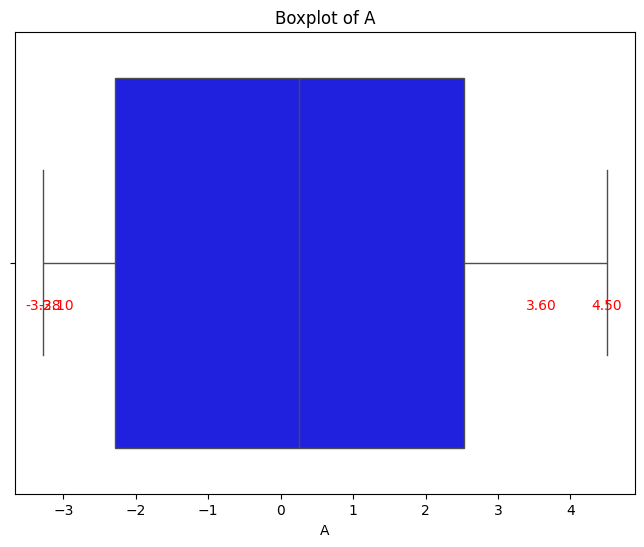

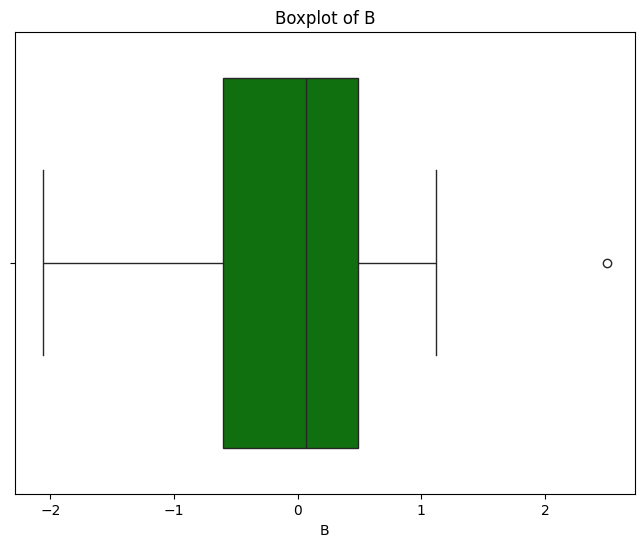

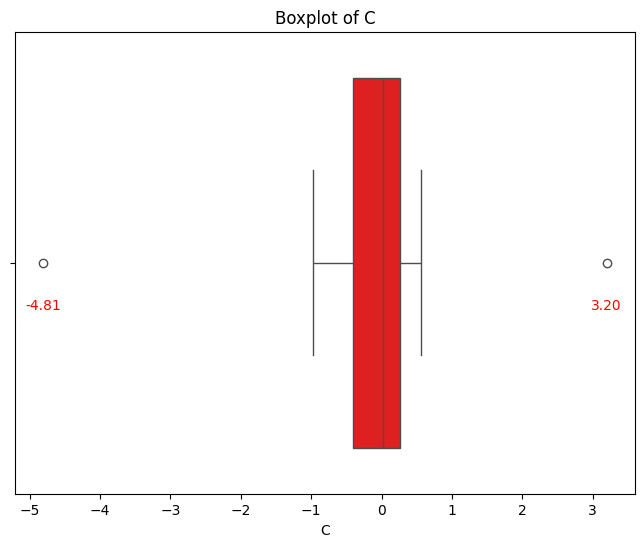

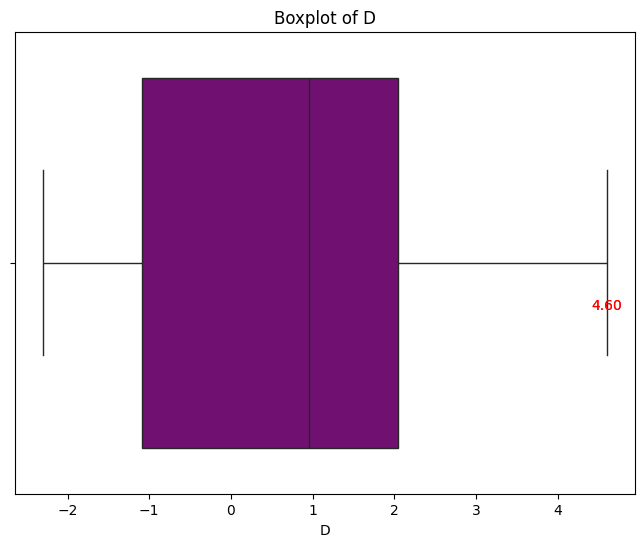

In [80]:
colors = ['blue', 'green', 'red', 'purple']
for column, color in zip(data.columns, colors):
    plt.figure(figsize=(8, 6))
    boxplot = sns.boxplot(x=data[column], color=color)
    plt.title(f'Boxplot of {column}')

    # Añadir etiquetas para los outliers
    outliers = data[column][outlier_mask[column]]
    for outlier in outliers:
        plt.text(outlier, 0.1, f'{outlier:.2f}', horizontalalignment='center', color='red')

    plt.show()

### Ejercicio_1: Para el siguiente dataframe, filtrar los valores atípicos. En este caso los atípicos son aquellos valores mayores a 1.25 y menores a -1.25. Los plots son opcionales.

In [81]:
data_1 = pd.DataFrame(np.random.standard_normal((1000, 4)), columns=['A', 'B', 'C', 'D'])
data_1.head()

,A,B,C,D
0,0.558868,-1.104176,1.086918,-2.467279
1,0.360829,-0.128103,-1.200838,0.466345
2,0.329710,-0.591857,-1.867441,-0.201754
3,0.000596,1.300387,-0.911819,-0.426114
4,-0.801240,-0.021433,-2.613296,-0.175055


### Ejercicio 2. Para el siguiente dataframe, filtrar los valores atípicos. En este caso los atípicos son aquellos valores mayores a 4 y menores a cero. Los plots son opcionales.

In [82]:
data_2 = pd.DataFrame(np.random.uniform(-5, 5, size=(1000, 5)), columns=['A', 'B', 'C', 'D', 'E'])
data_2

,A,B,C,D,E
0,4.229233,-4.525500,-2.686136,1.473225,2.211328
1,2.587560,-2.448072,1.137425,2.718450,-0.635909
2,-3.998965,2.891542,0.687665,3.348815,0.359226
3,-3.250490,0.464432,-3.992149,4.532664,-2.690771
4,-2.353984,1.222583,-0.072852,-2.723891,2.509658
...,...,...,...,...,...
995,4.618008,4.824005,4.023690,-1.548815,0.600647
996,4.060508,0.687780,-2.932022,0.031439,-0.325734
997,1.297167,-3.103775,4.944139,-1.113986,2.639106
998,-0.246397,-2.286624,4.968927,4.537330,0.866022


### 2.5 Permutación y muestreo aleatorio

Es posible permutar (reordenar aleatoriamente) una Serie o las filas de un DataFrame usando la función `numpy.random.permutation`. Llamar a `permutation` con la longitud del eje que se desea permutar produce un array de enteros que indican el nuevo ordenamiento:

In [83]:
df = pd.DataFrame(np.arange(5 * 7).reshape((5, 7)))
df

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34


In [84]:
sampler = np.random.permutation(5)
sampler

array([0, 1, 4, 2, 3], dtype=int32)

Este array puede utilizarse entonces en la indexación basada en `iloc` o en la función equivalente `take()
` :

In [85]:
df.take(sampler)
# Reordena las filas del DataFrame df según el índice proporcionado por sampler.

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
4,28,29,30,31,32,33,34
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27


In [86]:
df.iloc[sampler]

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
4,28,29,30,31,32,33,34
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27


Invocando `take()` con `axis="columns"`, también podríamos seleccionar una permutación de las columnas:

In [87]:
column_sampler = np.random.permutation(7)
column_sampler

array([0, 6, 2, 4, 5, 1, 3], dtype=int32)

In [88]:
df.take(column_sampler, axis="columns")

,0,6,2,4,5,1,3
0,0,6,2,4,5,1,3
1,7,13,9,11,12,8,10
2,14,20,16,18,19,15,17
3,21,27,23,25,26,22,24
4,28,34,30,32,33,29,31


Si se necesita seleccionar un subconjunto aleatorio (ramdom subset) sin reemplazo (la misma fila no puede aparecer dos veces), puede utilizar el método `sample()` en Series y DataFrame:

In [89]:
df

,0,1,2,3,4,5,6
0,0,1,2,3,4,5,6
1,7,8,9,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
4,28,29,30,31,32,33,34


In [90]:
df.sample(n=3)

,0,1,2,3,4,5,6
4,28,29,30,31,32,33,34
2,14,15,16,17,18,19,20
1,7,8,9,10,11,12,13


Para generar una muestra con reemplazo (para permitir elecciones repetidas), pase `replace=True` a `sample()`:

In [91]:
choices = pd.Series([5, 7, -1, 6, 4])
choices

0    5
1    7
2   -1
3    6
4    4
dtype: int64

In [92]:
choices.sample(n=10, replace=True)

2   -1
2   -1
1    7
3    6
0    5
4    4
3    6
4    4
4    4
3    6
dtype: int64

### 2.6 Cálculo de indicadores/variables ficticias (dummy)

Otro tipo de transformación que se utiliza mucho para modelado estadístico o aplicaciones de aprendizaje automático es convertir una `variable categórica` en un array de dummies o indicadores, en otras palabras convertir categorías a números. Si una columna en un DataFrame tiene k valores distintos, se derivaría un array o DataFrame con k columnas que contengan todos los 1s y 0s. Pandas tiene una función `pandas.get_dummies()` para hacer esto, aunque también podría idear una usted mismo. Veamos un ejemplo de DataFrame:

In [93]:
df = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b"],
                   "data1": range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [94]:
pd.get_dummies(df["key"], dtype=float)

,a,b,c
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0


Aquí se ha pasado `dtype=float` para cambiar el tipo de salida de boolean (el predeterminado en las versiones más recientes de pandas) a coma flotante (floating point).

In [95]:
df_1 = pd.get_dummies(df["key"])
df_1

,a,b,c
0,False,True,False
1,False,True,False
2,True,False,False
3,False,False,True
4,True,False,False
5,False,True,False


En algunos casos, es posible que desee añadir un prefijo a las columnas en el DataFrame del indicador, que luego se pueden fusionar con los otros datos. `pandas.get_dummies` tiene un argumento de prefijo para hacer esto:

In [96]:
dummies = pd.get_dummies(df["key"], prefix="key", dtype=float)
dummies

,key_a,key_b,key_c
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0


In [97]:
df_with_dummy = df[["data1"]].join(dummies) # .join lo veremos a detalle mas adelante
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0.0,1.0,0.0
1,1,0.0,1.0,0.0
2,2,1.0,0.0,0.0
3,3,0.0,0.0,1.0
4,4,1.0,0.0,0.0
5,5,0.0,1.0,0.0


Otro ejemplo

In [98]:
df_2 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b"],
                   "data1": range(6),
                   "Colores": ["Verde", "Rojo", "Verde", "Amarillo", "Rojo", "Verde"]})
df_2

,key,data1,Colores
0,b,0,Verde
1,b,1,Rojo
2,a,2,Verde
3,c,3,Amarillo
4,a,4,Rojo
5,b,5,Verde


In [99]:
dummies_1 = pd.get_dummies(df_2[["key", "Colores"]], prefix=["key", "Colores"], dtype=float)
dummies_1

,key_a,key_b,key_c,Colores_Amarillo,Colores_Rojo,Colores_Verde
0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0,1.0


Si una fila de un DataFrame contiene categorías, tenemos que utilizar un enfoque diferente para crear las variables ficticias. Veamos el conjunto de datos `MovieLens`:

In [100]:
mnames = ["movie_id", "title", "genres"]
movies = pd.read_table('movies.dat', sep="::",
                       header=None, names=mnames, engine="python")

movies[:10]  # Similar a un .head()                    

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


Pandas ha implementado un método especial de la serie `str.get_dummies` (los métodos que empiezan por `str`. Se tratan con más detalle más adelante en Manipulación de cadenas) que maneja este escenario de pertenencia a múltiples grupos codificados como una cadena delimitada:

In [101]:
dummies_2 = movies["genres"].str.get_dummies("|")
dummies_2

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [102]:
dummies_2.iloc[:10, :6]

,Action,Adventure,Animation,Children's,Comedy,Crime
0,0,0,1,1,1,0
1,0,1,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,1,0,0,0,0,1
6,0,0,0,0,1,0
7,0,1,0,1,0,0
8,1,0,0,0,0,0
9,1,1,0,0,0,0


Entonces, como antes, puedes combinar esto con `movies` añadiendo un `"Genre_"` a los nombres de las columnas en el DataFrame de `dummies` con el método `add_prefix`:

In [103]:
movies_windic = movies.join(dummies_2.add_prefix("Genre_"))
movies_windic

,movie_id,title,genres,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Children's,Genre_Comedy,Genre_Crime,Genre_Documentary,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
movies_windic.iloc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

Nota: Para datos mucho más grandes, este método de construcción de variables indicadoras con pertenencia múltiple no es especialmente rápido. Sería mejor escribir una función de nivel inferior que escriba directamente en una array de NumPy y, a continuación, envolver el resultado en un DataFrame.

Para aplicaciones estadísticas tambien se suele combinar `pandas.get_dummies` con una función de discretización como `pandas.cut`:

In [105]:
np.random.seed(12345) # para que el ejemplo sea repetible

values = np.random.uniform(size=10)
values

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503,
       0.5955447 , 0.96451452, 0.6531771 , 0.74890664, 0.65356987])

In [106]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

In [107]:
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,False,False,False,False,True
1,False,True,False,False,False
2,True,False,False,False,False
3,False,True,False,False,False
4,False,False,True,False,False
5,False,False,True,False,False
6,False,False,False,False,True
7,False,False,False,True,False
8,False,False,False,True,False
9,False,False,False,True,False


In [108]:
pd.get_dummies(pd.cut(values, bins), dtype=float)

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,1.0,0.0


### Ejercicio 3 (Permutaciones, muestreo): Dado el siguiente conjunto de datos:

In [109]:
'''
data = {
    'Tienda': ['A', 'B', 'C', 'D', 'E'],
    'Producto': ['P1', 'P2', 'P3', 'P4', 'P5'],
    'Ventas': [150, 200, 300, 250, 100]
}
'''

"\ndata = {\n    'Tienda': ['A', 'B', 'C', 'D', 'E'],\n    'Producto': ['P1', 'P2', 'P3', 'P4', 'P5'],\n    'Ventas': [150, 200, 300, 250, 100]\n}\n"

1- Crear un dataframe, luego establezca una semilla para la reproducibilidad del ejemplo:

In [110]:
# np.random.seed(42)

2- Crear dos dataframes mas; uno que sea una permutación de columnas y el otro una permutación filas.

3- Partiendo de los dos dataframes anteriores extraiga una muestra aletoria de 2 filas.

### Ejercicio 4 (get_dummies). Partiendo del siguiente diccionario:

In [111]:
'''
data = {
    'Nombre': ['Ana', 'Luis', 'María', 'Pedro', 'Laura', 'Carlos', 'Marta', 'Jorge'],
    'Edad': [23, 45, 31, 34, 28, 40, 36, 50],
    'Departamento': ['Ventas', 'IT', 'IT', 'Ventas', 'Marketing', 'Ventas', 'Marketing', 'IT'],
    'Salario': [50000, 60000, 55000, 52000, 58000, 51000, 60000, 62000]
}
'''

"\ndata = {\n    'Nombre': ['Ana', 'Luis', 'María', 'Pedro', 'Laura', 'Carlos', 'Marta', 'Jorge'],\n    'Edad': [23, 45, 31, 34, 28, 40, 36, 50],\n    'Departamento': ['Ventas', 'IT', 'IT', 'Ventas', 'Marketing', 'Ventas', 'Marketing', 'IT'],\n    'Salario': [50000, 60000, 55000, 52000, 58000, 51000, 60000, 62000]\n}\n"

1- Convertir el diccionario a un pandas dataframe

2- Convertir la columna departamento en variables dummy

3- Definir los límites (los intervalos) y etiquetas para los grupos de edad

4- Crear la nueva columna con nombre: Grupo_Edad utilizando .cut()

5-Imprime el dataframe final

## 2.7 Extension de tipos de datos 

Pandas se construyó originalmente sobre las capacidades presentes en NumPy, una librería de cálculo de arrays utilizada principalmente para trabajar con datos numéricos. Muchos conceptos de pandas, como los datos que faltan, se implementaron utilizando lo que estaba disponible en NumPy mientras se intentaba maximizar la compatibilidad entre las bibliotecas que utilizaban conjuntamente NumPy y Pandas.

Basarse en NumPy conllevó una serie de deficiencias, como:

El manejo de datos faltantes para algunos tipos de datos numéricos, como enteros y booleanos, era incompleto. Como resultado, cuando se introducían datos perdidos en tales datos, pandas convertía el tipo de datos a float64 y utilizaba np.nan para representar valores nulos. Esto tenía efectos agravantes al introducir problemas sutiles en muchos algoritmos de pandas.

Los conjuntos de datos con muchos datos de cadenas eran costosos computacionalmente y utilizaban mucha memoria.

Algunos tipos de datos, como intervalos de tiempo, timedeltas, y timestamps con zonas horarias, no podían ser soportados eficientemente sin usar arrays de objetos Python computacionalmente caros.

Más recientemente, pandas ha desarrollado un sistema de tipos de extensión que permite añadir nuevos tipos de datos aunque no estén soportados nativamente por NumPy. Estos nuevos tipos de datos pueden ser tratados como de primera clase junto con los datos procedentes de arrays NumPy.

Veamos un ejemplo en el que creamos una Serie de enteros con un valor perdido:

In [112]:
s = pd.Series([1, 2, 3, None])
s

0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64

In [113]:
s_2 = pd.Series([1,2,3])
s_2

0    1
1    2
2    3
dtype: int64

Por defecto, pandas tratará de inferir el tipo de datos de la serie.
Dado que hay un `None` en la lista, pandas convertirá automáticamente el tipo de datos a float64 porque el tipo float en pandas puede manejar valores nulos (NaN), mientras que el tipo `int` tradicional no puede.

In [114]:
s.dtype

dtype('float64')

Principalmente por razones de retrocompatibilidad, Series utiliza el comportamiento heredado de usar un tipo de datos float64 y np.nan para el valor perdido. Podríamos crear esta Serie en su lugar usando pandas.Int64Dtype:

In [115]:
s_1 = pd.Series([1, 2, 3, None], dtype=pd.Int64Dtype())
s_1

0       1
1       2
2       3
3    <NA>
dtype: Int64

Aquí, especificamos explícitamente que queremos usar el tipo de datos Int64 de pandas, que es un tipo de datos de enteros que soporta valores nulos.
Esto permite que la serie mantenga su tipo de datos como enteros (Int64), incluso con la presencia de valores nulos.
Los valores nulos se representan con <NA>, que es un valor nulo especial compatible con el tipo Int64.

In [116]:
s_1.dtype

Int64Dtype()

La salida `<NA>` indica que falta un valor para un array de tipo extensión. Esto utiliza el valor centinela especial `pandas.NA`:

In [117]:
s_1[3]

<NA>

In [118]:
s_1[3] is pd.NA

True

In [119]:
s[3] is pd.NA

False

También podríamos haber utilizado la abreviatura `"Int64"` en lugar de `pd.Int64Dtype()` para especificar el tipo. La mayúscula es necesaria, de lo contrario será un tipo sin extensión basado en NumPy:

In [120]:
s_3 = pd.Series([1, 2, 3, None], dtype="Int64")
s_3

0       1
1       2
2       3
3    <NA>
dtype: Int64

Pandas también tiene un tipo de extensión especializado para datos de cadena que no utiliza arrays de objetos NumPy (requiere la biblioteca pyarrow, que puede que necesite instalar por separado):

In [121]:
se = pd.Series(['one', 'two', None, 'three'])
se

0      one
1      two
2     None
3    three
dtype: object

In [122]:
s_4 = pd.Series(['one', 'two', None, 'three'], dtype=pd.StringDtype())
s_4

0      one
1      two
2     <NA>
3    three
dtype: string

Estos arrays de cadenas suelen utilizar mucha menos memoria y, con frecuencia, son más eficientes desde el punto de vista computacional para realizar operaciones en grandes conjuntos de datos.

En la siguiente Tabla figura una lista de algunos de los tipos de extensión disponibles. 

**Pandas extension data types**

`BooleanDtype`: Datos booleanos anulables, utilice `"boolean"` al pasarlos como cadena.

`CategoricalDtype`: Tipo de dato categórico, utilice `"category"` cuando pase como cadena

`DatetimeTZDtype`: Datetime with time zone

`Float32Dtype`: Coma flotante anulable 32-bit , use "Float32" cuando pase como cadena.

`Float64Dtype`: Coma flotante anulable de 64 bits, utilice "Float64" al pasar como cadena.

`Int8Dtype`: Entero con signo anulable de 8 bits, utilice "Int8" al pasarlo como cadena.

`Int16Dtype`: Entero con signo anulable de 16 bits, utilice "Int16" al pasarlo como cadena.

`Int32Dtype`: Entero con signo anulable de 32 bits, utilice "Int32" al pasarlo como cadena.

`Int64Dtype`: Entero con signo anulable de 64 bits, utilice "Int64" al pasarlo como cadena.

`UInt8Dtype`: Entero sin signo anulable de 8 bits, utilice "UInt8" al pasarlo como cadena.

`UInt16Dtype`: Entero sin signo anulable de 16 bits, utilice "UInt16" al pasarlo como cadena.

`UInt32Dtype`: Entero sin signo de 32 bits anulable, utilice "UInt32" al pasarlo como cadena.


`UInt64Dtype`: Entero sin signo de 64 bits anulable, use "UInt64" cuando pase como cadena.





Los tipos de extensión pueden pasarse al método Series `astype`, lo que permite convertirlos fácilmente como parte del proceso de limpieza de datos:

In [123]:
df = pd.DataFrame({"A": [1, 2, None, 4],
                   "B": ["one", "two", "three", None],
                   "C": [False, None, False, True]})

df

,A,B,C
0,1.0,one,False
1,2.0,two,None
2,NaN,three,False
3,4.0,None,True


In [124]:
df["A"] = df["A"].astype("Int64")

In [125]:
df["B"] = df["B"].astype("string")

In [126]:
 df["C"] = df["C"].astype("boolean")

In [127]:
df

,A,B,C
0,1,one,False
1,2,two,<NA>
2,<NA>,three,False
3,4,<NA>,True


## 2.8 Manipulación de cadenas (string)

Python ha sido durante mucho tiempo un lenguaje popular de manipulación de datos en bruto, en parte debido a su facilidad de uso para el procesamiento de cadenas y texto. La mayoría de las operaciones de texto se simplifican con los métodos incorporados en el objeto string. Para la comparación de patrones y manipulaciones de texto más complejas, pueden ser necesarias expresiones regulares. Pandas se suma a la mezcla al permitirle aplicar expresiones de cadena y regulares de forma concisa en arrays enteros de datos, manejando además la molestia de los datos que faltan.

### Métodos de objetos de cadena incorporados en Python

En muchas aplicaciones de manipulación de cadenas y scripts, los métodos de cadena incorporados son suficientes. Por ejemplo, una cadena separada por comas puede dividirse en trozos con split:

In [128]:
val = "a,b,  guido"
val.split(",")

['a', 'b', '  guido']

`split` se combina a menudo con `strip` para recortar los espacios en blanco (incluidos los saltos de línea):

In [129]:
pieces = [x.strip() for x in val.split(",")]
pieces

['a', 'b', 'guido']

Estas subcadenas (substrings) podrían concatenarse con un delimitador de dos puntos utilizando la suma:

In [130]:
first, second, third = pieces
first + "::" + second + "::" + third

'a::b::guido'

Pero éste no es un método genérico práctico. Una forma más rápida y pitónica es pasar una lista o tupla al método `join` sobre la cadena "::":

In [131]:
"::".join(pieces)

'a::b::guido'

Otros métodos se ocupan de localizar subcadenas. Utilizar la palabra clave `in` de Python es la mejor forma de detectar una subcadena, aunque también se pueden utilizar `index` y `find`:

In [132]:
"guido" in val

True

In [133]:
val.index(",")

1

In [134]:
val.find(":")

-1

Tenga en cuenta que la diferencia entre `find` e `index` es que index lanza una excepción si no se encuentra la cadena (en lugar de devolver -1):

In [135]:
val.index(":")

ValueError: substring not found

Por su parte, `count` devuelve el número de apariciones de una determinada subcadena:

In [ ]:
val.count(",")

`replace` sustituirá las ocurrencias de un patrón por otro. También se suele utilizar para eliminar patrones, pasando una cadena vacía:

In [136]:
val.replace(",", "::")

'a::b::  guido'

In [137]:
val.replace(",", "")

'ab  guido'

En el siguiente enlace puede encontrar mas [metodos de cadena]('https://www.w3schools.com/python/python_ref_string.asp')

### Expresiones Regulares

Las expresiones regulares proporcionan una forma flexible de buscar o hacer coincidir patrones de cadenas (a menudo más complejos) en el texto. Una expresión regular, comúnmente llamada regex, es una cadena formada según el lenguaje de expresiones regulares. El módulo `re` incorporado en Python se encarga de aplicar expresiones regulares a las cadenas; aquí daré varios ejemplos de su uso.

Las funciones del módulo `re` se dividen en tres categorías: coincidencia de patrones, sustitución y división. Naturalmente, todas ellas están relacionadas; un `regex` describe un patrón a localizar en el texto, que luego puede utilizarse para muchos fines. Veamos un ejemplo sencillo: supongamos que queremos dividir una cadena con un número variable de caracteres de espacio en blanco (tabuladores, espacios y nuevas líneas).

La expresión regular que describe uno o más caracteres de espacio en blanco es `\s+`:

In [138]:
import re
text = "foo    bar\t baz  \tqux"

re.split(r"\s+", text)

['foo', 'bar', 'baz', 'qux']

Cuando se llama a `re.split(r"\s+", text)`, primero se compila la expresión regular y luego se llama a su método split sobre el texto pasado. Puede compilar la expresión regular usted mismo con `re.compile`, formando un objeto `regex` reutilizable:

In [139]:
regex = re.compile(r"\s+")

regex.split(text)

['foo', 'bar', 'baz', 'qux']

Si, en cambio, desea obtener una lista de todos los patrones que coincidan con la expresión regular, puede utilizar el método `findall`:

In [140]:
regex.findall(text)

['    ', '\t ', '  \t']

Para evitar escapes no deseados con \ en una expresión regular, utilice literales de cadena sin procesar como `r"C:\x"` en lugar del equivalente `"C:\\x"`.

La creación de un objeto regex con `re.compile` es muy recomendable si se pretende aplicar la misma expresión a muchas cadenas; de este modo se ahorrarán ciclos de CPU.

`match` y `search` están estrechamente relacionados con `findall`. Mientras que `findall` devuelve todas las coincidencias de una cadena, `search` sólo devuelve la primera coincidencia. Más rígidamente, `match` sólo encuentra coincidencias al principio de la cadena. Como ejemplo menos trivial, consideremos un bloque de texto y una expresión regular capaz de identificar la mayoría de las direcciones de correo electrónico:

In [141]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com"""

pattern = r"[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}"

- `[A-Z0-9._%+-]+`:  
    - `[A-Z0-9._%+-]` es un conjunto de caracteres que incluye letras mayúsculas (A-Z), dígitos (0-9), y los caracteres ., _, %, +, y -.
    - `+` indica que uno o más de estos caracteres pueden aparecer.    
    - `@`: Un carácter de arroba literal.

- `[A-Z0-9.-]+`:
    - `[A-Z0-9.-]` es un conjunto de caracteres que incluye letras mayúsculas (A-Z), dígitos (0-9), y los caracteres . y -.
    - `+` indica que uno o más de estos caracteres pueden aparecer.

- `\.`: Un punto literal (el \ se usa para escapar el . ya que, en regex, el punto normalmente significa "cualquier carácter").

- `[A-Z]{2,4}`:
    - `[A-Z]` es un conjunto de letras mayúsculas.  
    - `{2,4}` indica que deben aparecer de 2 a 4 de estas letras (por ejemplo, .com, .net, .info).

In [142]:
regex = re.compile(pattern, flags=re.IGNORECASE)
# re.IGNORECASE hace que la expresión regular no distinga entre mayúsculas y minúsculas. 

Esta línea compila el patrón de expresión regular en un objeto regex utilizando la función `re.compile()`. `flags=re.IGNORECASE`  hace que la búsqueda sea insensible a mayúsculas y minúsculas. Es decir, A-Z en el patrón también coincidirá con a-z.

**Utilizando `findall` en el texto se obtiene una lista de las direcciones de correo electrónico**:

In [143]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

**`search` devuelve un objeto coincidente especial para la primera dirección de correo electrónico del texto. Para la regex anterior, el objeto coincidente sólo puede indicarnos la posición inicial y final del patrón en la cadena:**

In [144]:
m = regex.search(text)
m

<re.Match object; span=(5, 20), match='dave@google.com'>

`span=(5, 20)`: span es un tupla que indica los índices de inicio y fin de la coincidencia en la cadena original text.
En este caso, la subcadena que coincide comienza en el índice 5 y termina en el índice 20.

In [145]:
text[m.start():m.end()]

'dave@google.com'

`regex.match` devuelve `None`, ya que sólo coincidirá si el patrón aparece al principio de la cadena:

In [146]:
print(regex.match(text))

None


De forma similar, `sub` devolverá una nueva cadena con las ocurrencias del patrón sustituidas por una nueva cadena:

In [147]:
print(regex.sub("REDACTED", text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED


Supongamos que desea encontrar direcciones de correo electrónico y, al mismo tiempo, segmentar cada dirección en sus tres componentes: nombre de usuario, nombre de dominio y sufijo de dominio. Para ello, ponga entre paréntesis las partes del patrón que desea segmentar:

In [148]:
pattern = r"([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})"

regex = re.compile(pattern, flags=re.IGNORECASE)

Un objeto match producido por esta regex modificada devuelve una tupla de los componentes del patrón con su método groups:

In [149]:
m = regex.match("wesm@bright.net")

m.groups()

('wesm', 'bright', 'net')

`findall` devuelve una lista de tuplas cuando el patrón tiene grupos:

In [150]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

`sub` también tiene acceso a los grupos de cada coincidencia mediante símbolos especiales como `\1` y `\2`. El símbolo `\1` corresponde al primer grupo coincidente, `\2` corresponde al segundo, y así sucesivamente:

In [151]:
print(regex.sub(r"Username: \1, Domain: \2, Suffix: \3", text))

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com


A continuación algunos metodos adicionales de expresiones regulares.

`findall`: Devuelve todos los patrones coincidentes no solapados en una cadena como una lista.

`finditer`: Como findall, pero devuelve un iterador.

`match`: 	Coincide con el patrón al inicio de la cadena y opcionalmente segmenta los componentes del patrón en grupos; si el patrón coincide, devuelve un objeto coincidente, y en caso contrario `None`.

`search`: Escanea la cadena en busca de coincidencias con el patrón, devolviendo un objeto coincidente si es así; a diferencia de match, la coincidencia puede estar en cualquier parte de la cadena en lugar de sólo al principio.

`split`: Rompe la cadena en trozos en cada aparición del patrón.

`sub, subn`: Reemplazar todas (`sub`) o las primeras `n` ocurrencias (`subn`) del patrón en la cadena con la expresión de reemplazo; utilizar los símbolos `\1`, `\2`, ... para referirse a los elementos del grupo de coincidencia en la cadena de reemplazo.

### Funciones de cadena en pandas

Limpiar un conjunto de datos desordenado para su análisis suele requerir mucha manipulación de cadenas. Para complicar las cosas, una columna que contiene cadenas a veces tiene datos que faltan:

In [152]:
data = {"Dave": "dave@google.com",
        "Steve": "steve@gmail.com",
        "Rob": "rob@gmail.com",
        "Wes": np.nan}

data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [153]:
data.isna()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

Se pueden aplicar métodos de cadenas y expresiones regulares (pasando una `lambda` u otra función) a cada valor utilizando `data.map`, pero fallará en los valores NA (nulos). Para hacer frente a esto, Series dispone de métodos orientados a arrays para operaciones con cadenas que omiten y propagan los valores NA. Se accede a ellos a través del atributo str de Series; por ejemplo, podríamos comprobar si cada dirección de correo electrónico contiene "gmail" con `str.contains`:

In [154]:
data.str.contains("gmail")

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

Tenga en cuenta que el resultado de esta operación tiene un dtype objeto. pandas tiene tipos de extensión que proporcionan un tratamiento especializado de cadenas, enteros y datos booleanos:

In [155]:
data_as_string_ext = data.astype('string')
data_as_string_ext

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                 <NA>
dtype: string

In [156]:
data_as_string_ext.str.contains("gmail")

Dave     False
Steve     True
Rob       True
Wes       <NA>
dtype: boolean

También se pueden utilizar expresiones regulares, junto con otras opciones como IGNORECASE:

In [157]:
pattern = r"([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})"
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

Puede utilizar str.get o indexar en el atributo str:

In [158]:
matches = data.str.findall(pattern, flags=re.IGNORECASE).str[0]
# busca todas las coincidencias del patrón en cada elemento 
# de la Serie y devuelve listas de tuplas con las coincidencias encontradas.
# .str[0] selecciona la primera coincidencia en cada lista de coincidencias.
matches

Dave     (dave, google, com)
Steve    (steve, gmail, com)
Rob        (rob, gmail, com)
Wes                      NaN
dtype: object

In [159]:
# matches = data.str.findall(pattern, flags=re.IGNORECASE)
# matches

In [160]:
matches.str.get(1)

Dave     google
Steve     gmail
Rob       gmail
Wes         NaN
dtype: object

De forma similar, puede cortar cadenas utilizando esta sintaxis:

In [161]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

El método `str.extract` devolverá los grupos capturados de una expresión regular como un DataFrame:

In [162]:
data.str.extract(pattern, flags=re.IGNORECASE)

,0,1,2
Dave,dave,google,com
Steve,steve,gmail,com
Rob,rob,gmail,com
Wes,NaN,NaN,NaN


En la siguiente tabla se muestran otros métodos de String en Series

`cat`: Concatenar cadenas por elementos con un delimitador opcional

`contains`: Devuelve una matriz booleana si cada cadena contiene un patrón/regex.

`count`: Contar ocurrencias del patrón

`extract`: Utilice una expresión regular con grupos para extraer una o varias cadenas de una serie de cadenas; el resultado será un DataFrame con una columna por grupo.

`endswith`: Equivale a x.endswith(pattern) para cada elemento

`startswith`: Equivale a x.startswith(pattern) para cada elemento

 `findall`: Calcula la lista de todas las apariciones del patrón/regex para cada cadena.
 
 `get`: Índice en cada elemento (recuperar el i-ésimo elemento)
 
 `isalnum`: Equivalente a str.alnum incorporado
 
 `isalpha`: Equivalente al built-in str.isalpha.
 
 `isdecimal`: Equivalente al built-in str.isdecimal.

`isdigit`: Equivalente al built-in str.isdigit

`islower`: Equivalent to built-in str.islower

`isnumeric`: Equivalent to built-in str.isnumeric.

`isupper`: Equivalent to built-in str.isupper.

`join`: Une las cadenas de cada elemento de la Serie con el separador pasado.

`len`: Calcular la longitud de cada cadena.

`lower, upper` : Convertir casos; equivalente a x.lower() o x.upper() para cada elemento.

`match`: Utiliza re.match con la expresión regular pasada en cada elemento, devolviendo True o False si coincide

`pad`: Añadir espacios en blanco a la izquierda, a la derecha o a ambos lados de las cadenas

`center`: Equivale a pad(side="both")

`replace`: Reemplazar las ocurrencias de un patrón/regex por otra cadena

`slice`: Corta cada cadena de la serie

`split` : Dividir cadenas según delimitador o expresión regular

`strip`: Recorta los espacios en blanco de ambos lados, incluidas las nuevas líneas.

`rstrip`: Recortar los espacios en blanco de la derecha.

`lstrip`: Recortar los espacios en blanco de la izquierda. 

### Ejercicio 5. Expresiones regulares.

#### Dado el siguiente Diccionario:  

In [163]:
'''
data = {
    'Name': [
        'Dave', 'Steve', 'Rob', 'Ryan', 'Alice', 'Eve', 'John', 'Jane', 'Peter', 'Mary', 'Tom', 'Lucy', 
        'Mike', 'Chris', 'Emma', 'Olivia', 'Sophia', 'Liam', 'Noah', 'Mason', 'Ava', 'Mia', 'James', 'Benjamin'
    ],
    'Email': [
        'dave@google.com', 'steve@gmail.com', 'rob@yahoo.com', 'ryan@gmail.com', 
        'alice@hotmail.com', 'eve@google.com', 'john@outlook.com', 'jane@gmail.com',
        'peter@amazon.com', 'mary@google.com', 'tom@apple.com', 'lucy@yahoo.com',
        'mike@facebook.com', 'chris@netflix.com', 'emma@google.com', 'olivia@gmail.com',
        'sophia@amazon.com', 'liam@apple.com', 'noah@google.com', 'mason@yahoo.com',
        'ava@outlook.com', 'mia@gmail.com', 'james@hotmail.com', 'benjamin@google.com'
    ]
}
'''

"\ndata = {\n    'Name': [\n        'Dave', 'Steve', 'Rob', 'Ryan', 'Alice', 'Eve', 'John', 'Jane', 'Peter', 'Mary', 'Tom', 'Lucy', \n        'Mike', 'Chris', 'Emma', 'Olivia', 'Sophia', 'Liam', 'Noah', 'Mason', 'Ava', 'Mia', 'James', 'Benjamin'\n    ],\n    'Email': [\n        'dave@google.com', 'steve@gmail.com', 'rob@yahoo.com', 'ryan@gmail.com', \n        'alice@hotmail.com', 'eve@google.com', 'john@outlook.com', 'jane@gmail.com',\n        'peter@amazon.com', 'mary@google.com', 'tom@apple.com', 'lucy@yahoo.com',\n        'mike@facebook.com', 'chris@netflix.com', 'emma@google.com', 'olivia@gmail.com',\n        'sophia@amazon.com', 'liam@apple.com', 'noah@google.com', 'mason@yahoo.com',\n        'ava@outlook.com', 'mia@gmail.com', 'james@hotmail.com', 'benjamin@google.com'\n    ]\n}\n"

### Una vez pasado el diccionario a un DataFrame que contiene nombres y direcciones de correo electrónico, realiza las siguientes tareas:

- Extrae los dominios de los correos electrónicos.
- Cuenta la frecuencia de cada dominio.
- Crea un nuevo DataFrame que contenga cada dominio como columna y el número de veces que se repiten dichos dominios en las filas.
#### Resolver de las dos formas: Usando expresiones regulares y usando los métodos propios de pandas.

## Solución con expresiones regulares

## Solución con los métodos propios de Pandas

## 2.9 Datos Categóricos

In [164]:
values = pd.Series(['apple', 'orange', 'apple',
                    'apple'] * 2)
values               

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [165]:
pd.unique(values)

array(['apple', 'orange'], dtype=object)

In [166]:
pd.value_counts(values)

C:\Users\juanj\AppData\Local\Temp\ipykernel_17856\3297668723.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(values)


apple     6
orange    2
Name: count, dtype: int64

In [167]:
pd.Series(values).value_counts()

apple     6
orange    2
Name: count, dtype: int64

Muchos sistemas de datos (para almacenamiento de datos, cálculo estadístico u otros usos) han desarrollado enfoques especializados para representar datos con valores repetidos para un almacenamiento y cálculo más eficientes. En el almacenamiento de datos, una práctica recomendada consiste en utilizar las denominadas tablas de dimensiones, que contienen los valores distintos y almacenan las observaciones primarias como claves enteras que hacen referencia a la tabla de dimensiones:

In [168]:
values = pd.Series([0, 1, 0, 0] * 2)
values

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
dtype: int64

In [169]:
dim = pd.Series(['apple', 'orange'])
dim

0     apple
1    orange
dtype: object

Podemos utilizar el método `take` para restaurar la serie original de cadenas:

In [170]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

Esta representación como números enteros se denomina representación categórica o codificada en diccionario. La array de valores distintos puede denominarse categorías, diccionario o niveles de los datos. Aqui utilizaremos los términos categórico y categorías. Los valores enteros que hacen referencia a las categorías se denominan códigos de categoría o simplemente códigos.

### Ejemplo

Supongamos que tenemos una serie de índices codificados que representan diferentes tipos de mascotas, y una serie de etiquetas que contienen los nombres de las mascotas. Queremos usar el método take para reconstruir las etiquetas originales a partir de los índices.

In [171]:
# Series de índices codificados
encoded_labels = pd.Series([0, 1, 2, 1, 0, 2, 2, 0])

# Series de etiquetas originales
pet_labels = pd.Series(['cat', 'dog', 'bird'])

# Reconstruir las etiquetas originales
decoded_labels = pet_labels.take(encoded_labels)

decoded_labels

0     cat
1     dog
2    bird
1     dog
0     cat
2    bird
2    bird
0     cat
dtype: object

### Ejercicio 6. Dados los siguientes datos:

In [172]:
'''
encoded_labels = [
    0, 1, 2, 3, 0, 4, 5, 6, 2, 1, 3, 0, 5, 4, 6, 1, 2, 5, 4, 3,
    7, 8, 9, 10, 7, 11, 12, 13, 9, 8, 10, 7, 12, 11, 13, 8, 9, 12, 11, 10,
    14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33
]

animal_labels = [
    'cat', 'dog', 'bird', 'fish', 'lion', 'tiger', 'bear', 'elephant', 
    'giraffe', 'zebra', 'kangaroo', 'koala', 'panda', 'monkey',
    'shark', 'whale', 'dolphin', 'penguin', 'ostrich', 'crocodile', 
    'alligator', 'hippopotamus', 'rhinoceros', 'cheetah', 'leopard', 
    'jaguar', 'wolf', 'fox', 'rabbit', 'squirrel', 'bat', 'owl', 
    'hawk', 'eagle'
]

'''

"\nencoded_labels = [\n    0, 1, 2, 3, 0, 4, 5, 6, 2, 1, 3, 0, 5, 4, 6, 1, 2, 5, 4, 3,\n    7, 8, 9, 10, 7, 11, 12, 13, 9, 8, 10, 7, 12, 11, 13, 8, 9, 12, 11, 10,\n    14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33\n]\n\nanimal_labels = [\n    'cat', 'dog', 'bird', 'fish', 'lion', 'tiger', 'bear', 'elephant', \n    'giraffe', 'zebra', 'kangaroo', 'koala', 'panda', 'monkey',\n    'shark', 'whale', 'dolphin', 'penguin', 'ostrich', 'crocodile', \n    'alligator', 'hippopotamus', 'rhinoceros', 'cheetah', 'leopard', \n    'jaguar', 'wolf', 'fox', 'rabbit', 'squirrel', 'bat', 'owl', \n    'hawk', 'eagle'\n]\n\n"

1- Recrear las etiquetas originales a partir de los índices codificados.  
2- Contar la frecuencia de cada etiqueta de animal.  
3- Identificar las etiquetas de animales únicas presentes en los datos.  
4- Determinar el animal más frecuente y el menos frecuente.  
5- Agrupar los animales y contar la frecuencia por grupos (mamíferos, aves, reptiles, etc.).  
6- Identificar la posición de las primeras y últimas ocurrencias de cada animal.  
7- Generar un resumen estadístico de las frecuencias de los animales (media, mediana, desviación estándar).  
8- Filtrar y mostrar solo los animales con una frecuencia mayor que 2.  
9- Encontrar y mostrar las etiquetas de animales que aparecen solo una vez.  
10- Calcular el porcentaje de apariciones de cada animal respecto al total.  
11- Ordenar las etiquetas de animales por frecuencia en orden descendente.  
12- Generar un DataFrame que muestre la frecuencia acumulativa de las etiquetas.

### 2.10 Extension de tipos de datos categóricos en Pandas

Pandas tiene un tipo de extensión especial `Categorical` para contener datos que utilizan la representación o codificación categórica basada en enteros. Esta es una técnica popular de compresión de datos para datos con muchas ocurrencias de valores similares y puede proporcionar un rendimiento significativamente más rápido con un menor uso de memoria, especialmente para datos de cadenas.

Volvamos al ejemplo de la serie anterior:

In [175]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2

In [176]:
N = len(fruits)
N

8

In [174]:
rng = np.random.default_rng(seed=12345)
# para crear una instancia de un generador de números aleatorio

In [178]:
df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': rng.integers(3, 15, size=N),
                   'weight': rng.uniform(0, 4, size=N)},
                    columns=['basket_id', 'fruit', 'count', 'weight'])

df

,basket_id,fruit,count,weight
0,0,apple,11,2.789814
1,1,orange,11,1.305891
2,2,apple,4,2.935713
3,3,apple,4,0.880540
4,4,apple,6,0.326378
5,5,orange,8,0.639582
6,6,apple,3,1.360401
7,7,apple,13,1.860773


Aquí, `df['fruta']` es un array de objetos de cadena de Python. Podemos convertirlo en categórico llamando a:

In [179]:
columna = df['fruit']
columna

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: object

In [181]:
fruit_cat = df['fruit'].astype('category')
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

Los valores de `fruit_cat` son ahora una instancia de `pandas.Categorical`, a la que se puede acceder mediante el atributo .array:

In [184]:
c = fruit_cat.array
type(c)

pandas.core.arrays.categorical.Categorical

El objeto `Categorical` tiene atributos de categorías y códigos:

In [183]:
c.categories

Index(['apple', 'orange'], dtype='object')

In [185]:
c.codes
# proporciona un array de enteros que representa las categorías en fruit_cat 
# de manera eficiente. Cada entero en el array corresponde a una categoría específica,
# lo que permite un almacenamiento y procesamiento de datos categóricos más eficiente y rápido en Pandas.

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

Un truco útil para obtener una correspondencia entre códigos y categorías es:

In [186]:
dict(enumerate(c.categories))


{0: 'apple', 1: 'orange'}

Puede convertir una columna DataFrame en categórica asignando el resultado convertido:

In [194]:
# Veamos el tipo de dato de la columna fruit
print(df['fruit'].dtype)

object


In [198]:
df['fruit'] = df['fruit'].astype('category')

In [199]:
df["fruit"]

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): ['apple', 'orange']

In [200]:
# o tambien
print(df['fruit'].dtype)

category


También puede crear `pandas.Categorical` directamente a partir de otros tipos de secuencias de Python:

In [201]:
my_categories = pd.Categorical(['foo', 'bar', 'baz', 'foo', 'bar'])
my_categories

['foo', 'bar', 'baz', 'foo', 'bar']
Categories (3, object): ['bar', 'baz', 'foo']

In [202]:
print(my_categories.dtype)

category


Si ha obtenido datos categóricos codificados de otra fuente, puede utilizar el constructor alternativo `from_codes`:

In [203]:
categories = ['foo', 'bar', 'baz']
codes = [0, 1, 2, 0, 0, 1]

In [158]:
my_cats_2 = pd.Categorical.from_codes(codes, categories)
my_cats_2

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo', 'bar', 'baz']

A menos que se especifique explícitamente, las conversiones categóricas no asumen un orden específico de las categorías. Por lo tanto, el array de categorías puede estar en un orden diferente dependiendo del orden de los datos de entrada. Cuando utilice `from_codes` o cualquiera de los otros constructores, puede indicar que las categorías tienen un orden significativo:

In [159]:
ordered_cat = pd.Categorical.from_codes(codes, categories,
                                        ordered=True)
ordered_cat

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo' < 'bar' < 'baz']

La salida `[foo < bar < baz]` indica que 'foo' precede a 'bar' en la ordenación, y así sucesivamente. Una instancia categórica desordenada puede ordenarse con `as_ordered`:

In [160]:
my_cats_2.as_ordered()

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo' < 'bar' < 'baz']

Por ejemplo, si las categorías representan niveles de satisfacción como 'low', 'medium', y 'high', puedes definirlas con un orden:

In [205]:
categories = ['low', 'medium', 'high']
codes = [0, 1, 2, 0, 1, 2]

# Crear un objeto categórico con un orden
ordered_cats = pd.Categorical.from_codes(codes, categories, ordered=True)

# Mostrar el resultado
print(ordered_cats)

['low', 'medium', 'high', 'low', 'medium', 'high']
Categories (3, object): ['low' < 'medium' < 'high']


Por último, los datos categóricos no tienen por qué ser cadenas, aunque sólo he mostrado ejemplos de cadenas. Un array categórico puede consistir en cualquier tipo de valor inmutable.

### Ejercicio 7. Análisis de Tipos de Productos en una Tienda

In [207]:
### Partiendo del siguiente diccionario:
data = {
    'product_id': [1, 2, 3, 4, 5, 6],
    'product_name': ['apple', 'banana', 'carrot', 'apple', 'banana', 'carrot'],
    'category': ['fruit', 'fruit', 'vegetable', 'fruit', 'fruit', 'vegetable']
}

1- Llevar el dicionario a un dataframe y mostrarlo.  
2- Consultar los tipos de datos de cada columna.  
3- Convertir la Columna category a Tipo Categórico.    
4- Acceder a las Categorías y Códigos (cat.categories y cat.codes)

### 2.11 Cálculos con datos categóricos

El uso de `Categorical` en pandas comparado con la versión no codificada (como un array de cadenas) generalmente se comporta de la misma manera. Algunas partes de pandas, como la función `groupby`, funcionan mejor cuando se trabaja con `categoricals`. También hay algunas funciones que pueden utilizar la bandera `ordered`.

Consideremos algunos datos numéricos aleatorios y utilicemos la función `pandas.qcut binning`. Esto devuelve `pandas.Categorical`; hemos usado `pandas.cut` anteriormente pero hemos pasado por alto los detalles de cómo funcionan los categóricos:

In [208]:
rng = np.random.default_rng(seed=12345)

draws = rng.standard_normal(1000)

draws[:5]

array([-1.42382504,  1.26372846, -0.87066174, -0.25917323, -0.07534331])

Calculemos un intervalo de cuartiles de estos datos y extraigamos algunas estadísticas:

In [209]:
bins = pd.qcut(draws, 4)
bins

[(-3.121, -0.675], (0.687, 3.211], (-3.121, -0.675], (-0.675, 0.0134], (-0.675, 0.0134], ..., (0.0134, 0.687], (0.0134, 0.687], (-0.675, 0.0134], (0.0134, 0.687], (-0.675, 0.0134]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.121, -0.675] < (-0.675, 0.0134] < (0.0134, 0.687] < (0.687, 3.211]]

Aunque son útiles, los cuartiles exactos de la muestra pueden ser menos útiles para elaborar un informe que los nombres de los cuartiles. Podemos conseguirlo con el argumento labels de `qcut`:

In [210]:
bins = pd.qcut(draws, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
bins

['Q1', 'Q4', 'Q1', 'Q2', 'Q2', ..., 'Q3', 'Q3', 'Q2', 'Q3', 'Q2']
Length: 1000
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [211]:
bins.codes[:10]

array([0, 3, 0, 1, 1, 0, 0, 2, 2, 0], dtype=int8)

La etiqueta categórica `bins` no contiene información sobre los bordes de los bins en los datos, por lo que podemos utilizar `groupby` para extraer algunos estadísticos de resumen:

In [212]:
bins = pd.Series(bins, name='quartile')

In [214]:
results = (pd.Series(draws)
           .groupby(bins, observed=True)
           .agg(['count', 'min', 'max'])
           .reset_index())
# el método agg calcula las estadísticas resumidas para cada grupo, 
# en este caso, el número de elementos en cada grupo, 
# el valor mínimo y el valor máximo.
results

,quartile,count,min,max
0,Q1,250,-3.119609,-0.678494
1,Q2,250,-0.673305,0.008009
2,Q3,250,0.018753,0.686183
3,Q4,250,0.688282,3.211418


La columna "quartile" del resultado conserva la información categórica original, incluida la ordenación, de los intervalos:

In [169]:
results['quartile']

0    Q1
1    Q2
2    Q3
3    Q4
Name: quartile, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

### Mejor rendimiento con categóricos

Como anteriormente se ha dicho que los tipos categóricos pueden mejorar el rendimiento y el uso de memoria, así que veamos algunos ejemplos. Consideremos una serie con 10 millones de elementos y un pequeño número de categorías distintas:

In [218]:
N = 10_000_000

In [219]:
labels = pd.Series(['Vegano', 'Ecológico', 'Sin GLuten', 'Normal'] * (N // 4))
labels

0              Vegano
1           Ecológico
2          Sin GLuten
3              Normal
4              Vegano
              ...    
9999995        Normal
9999996        Vegano
9999997     Ecológico
9999998    Sin GLuten
9999999        Normal
Length: 10000000, dtype: object

Ahora convertimos las etiquetas en categóricas:

In [220]:
categories = labels.astype('category')

In [221]:
categories.head()

0        Vegano
1     Ecológico
2    Sin GLuten
3        Normal
4        Vegano
dtype: category
Categories (4, object): ['Ecológico', 'Normal', 'Sin GLuten', 'Vegano']

Ahora observamos que las etiquetas utilizan bastante más memoria que las categorías:

In [222]:
labels.memory_usage(deep=True)

735000132

In [223]:
categories.memory_usage(deep=True)

10000598

La conversión a categoría no es gratuita, por supuesto, pero es un coste único:

In [225]:
%time _ = labels.astype('category')
# se utiliza para medir el tiempo que tarda en ejecutarse
# la conversión de una Serie de Pandas a un tipo categórico.

CPU times: total: 516 ms
Wall time: 629 ms


`CPU time (516 ms)`: La CPU tardó un total de 516 milisegundos ejecutando la operación de conversión.  
`Wall time (629 ms)`: El tiempo total transcurrido, incluyendo cualquier espera por recursos, fue de 629 milisegundos.

Las operaciones `GroupBy` pueden ser significativamente más rápidas con categóricas porque los algoritmos subyacentes utilizan arrays de códigos basada en enteros en lugar de un array  de cadenas. Aquí comparamos el rendimiento de value_counts(), que utiliza internamente el método `GroupBy`:

In [226]:
 %timeit labels.value_counts()

411 ms ± 43.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [227]:
%timeit categories.value_counts()

58.9 ms ± 3.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


###  Métodos categóricos

Las series que contienen datos categóricos disponen de varios métodos especiales similares a los métodos de cadena especializados de Series.str. Esto también proporciona un acceso conveniente a las categorías y códigos. Considere la Serie:

In [229]:
s = pd.Series(['a', 'b', 'c', 'd'] * 2)  
s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: object

In [230]:
cat_s = s.astype('category')
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

El atributo especial de acceso `cat` proporciona acceso a métodos categóricos:

In [183]:
cat_s.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [184]:
cat_s.cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

Supongamos que sabemos que el conjunto real de categorías para estos datos se extiende más allá de los cuatro valores observados en los datos. Podemos utilizar el método `set_categories` para cambiarlas:

In [231]:
actual_categories = ['a', 'b', 'c', 'd', 'e']

cat_s2 = cat_s.cat.set_categories(actual_categories)

cat_s2

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

Aunque parezca que los datos no cambian, las nuevas categorías se reflejarán en las operaciones que las utilicen. Por ejemplo, value_counts respeta las categorías, si están presentes:



In [232]:
 cat_s.value_counts()

a    2
b    2
c    2
d    2
Name: count, dtype: int64

In [233]:
cat_s2.value_counts()

a    2
b    2
c    2
d    2
e    0
Name: count, dtype: int64

In [236]:
cat_s2

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

En grandes conjuntos de datos, las categorías se utilizan a menudo como una herramienta conveniente para ahorrar memoria y mejorar el rendimiento. Después de filtrar un gran DataFrame o Series, muchas de las categorías pueden no aparecer en los datos. Para ayudar con esto, podemos utilizar el método remove_unused_categories para recortar las categorías no observadas:

In [234]:
cat_s3 = cat_s[cat_s.isin(['a', 'b'])]
cat_s3

0    a
1    b
4    a
5    b
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [235]:
cat_s3.cat.remove_unused_categories()

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): ['a', 'b']

### Ejercicio 8. Basado en los siguientes datos:  


In [237]:
'''
data = {
    'consumer_id': range(1, 21),
    'product_preference': [
        'Vegano', 'Ecológico', 'Sin Gluten', 'Normal', 'Ecológico',
        'Vegano', 'Normal', 'Sin Gluten', 'Vegano', 'Ecológico',
        'Normal', 'Ecológico', 'Sin Gluten', 'Vegano', 'Normal',
        'Vegano', 'Sin Gluten', 'Normal', 'Normal', 'Vegano'
    ]
}
'''

**Responder las siguientes preguntas.**

1- Crear un dataframe e imprima un head.  
2- Cambiar el dtype de product_preference a categórico.   
3- Medir el uso de memoria antes y después de convertir a categórico.  
4- Añadir dos categorías más: Orgánico y Keto.  
5- Filtrar los datos para incluir solo preferencias 'Vegano' y 'Ecológico'.  
6- Eliminar categorías no utilizadas en los datos filtrados.  
7- Medir el tiempo de ejecución de `value_counts()` en la columna `product_preference`.  
8- Reordenar las categorías en un orden específico.  
9- Obtener estadísticas descriptivas de la columna categórica.  
10- Agrupar los datos por `product_preference` y contar el número de consumidores en cada categoría.  
11- Transformar categorías a números utilizando `cat.codes`.  
